<a href="https://colab.research.google.com/github/BBose6/Astro-Obj-Team-Collab/blob/main/psgq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Predicting Stars, Galaxies & Quasars with ML Model`

# About the Problem & Our Dataset -
So what exactly are stars, galaxies, and quasars?
<p align="justify">A GALAXY is a gravitationally bound system of stars, stellar remnants, interstellar gas, dust, and dark matter. Galaxies are categorised according to their visual morphology as elliptical, spiral, or irregular. Many galaxies are thought to have supermassive black holes at their active centers.</p>



<p align="justify">A STAR is a type of astronomical object consisting of a luminous spheroid of plasma held together by its own gravity. The nearest star to Earth is the Sun.



<p align="justify">A QUASAR, also known as a quasi-stellar object, is an extremely luminous active galactic nucleus (AGN). The power radiated by quasars is enormous. A typical quasar is 27 trillion times brighter than our sun! If you were to place a quasar at the distance of Pluto, it would vaporise all of Earth’s oceans to steam in a fifth of a second.

In [83]:
#Importing Necessary Libraries

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

# Manipulating Data and Model Building
import tensorflow as tf
from tensorflow import keras

# Data Analysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Measuring Classification Performance
from sklearn.metrics import accuracy_score

# Classification & Regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [84]:
# Importing the Dataset
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# EDA

In [85]:
# Loading data into dataframe
df = pd.read_csv('/content/drive/MyDrive/Final Year Project/Skyserver_SQL2_27_2018 6_51_39 PM.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [86]:
df.shape

(10000, 18)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [88]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,1.577039e+05,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


Removing object ID column as it's not useful in anlysis

In [89]:
df.drop(['objid','specobjid'],axis=1,inplace=True)

In [90]:
df.head(2)

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,STAR,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,STAR,-0.000055,323,51615,541


In [91]:
df.shape

(10000, 16)

In [92]:
df.describe()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,5.353854,8410.000000,57481.000000,1000.000000


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  object 
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(7), object(1)
memory usage: 1.2+ MB


`The Target from data is Data classification to Star Galaxy or Quasar, so the class column has 3 Categories and in this case we need to convert them into numeric data.`

Sklearn provides a very efficient tool for encoding the levels of categorical features into numeric values. LabelEncoder().fit encodes labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier. You can read more about it here!

In [94]:
le = LabelEncoder().fit(df['class'])
df['class'] = le.transform(df['class'])

In [95]:
df.head()

,ra,dec,u,g,r,i,z,run,rerun,camcol,field,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,2,-0.000009,3306,54922,491
1,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,2,0.000590,3306,54922,512


After lable encoding, Galaxies have been replaced by number 0, Quasars by number 1 and Stars by number 2

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        10000 non-null  float64
 1   dec       10000 non-null  float64
 2   u         10000 non-null  float64
 3   g         10000 non-null  float64
 4   r         10000 non-null  float64
 5   i         10000 non-null  float64
 6   z         10000 non-null  float64
 7   run       10000 non-null  int64  
 8   rerun     10000 non-null  int64  
 9   camcol    10000 non-null  int64  
 10  field     10000 non-null  int64  
 11  class     10000 non-null  int64  
 12  redshift  10000 non-null  float64
 13  plate     10000 non-null  int64  
 14  mjd       10000 non-null  int64  
 15  fiberid   10000 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 1.2 MB


Since all numeric values hence no need of further encoding

`Test, Train, Split`

In [97]:
X = df.drop('class',axis=1)
y = df['class']

# Data Scaling
Scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1). StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. You can read more about other types of scalers here and scaling in general here.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True,with_mean=True,with_std=True)
X = scaler.fit_transform(X)

In [99]:
X[:20]

array([[ 0.16745842, -0.58492272,  1.03148637, -0.34855938, -0.83728027,
        -0.94605772, -0.99534154, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36973112,  1.03148936,  1.30931064,  0.66863177],
       [ 0.16886159, -0.58311429,  0.05243046, -0.16653251, -0.15415531,
        -0.08264457, -0.02604308, -0.83806089,  0.        ,  0.21085172,
        -0.21763043, -0.36984929, -0.63621258, -0.87919741,  0.91101156],
       [ 0.17057433, -0.58347525,  0.92156796,  0.86709322,  0.59315368,
         0.44120145,  0.31452753, -0.83806089,  0.        ,  0.21085172,
        -0.21147922, -0.05302706, -0.65633905, -0.60919097,  0.77527888],
       [ 0.17455754, -0.58650069, -1.03063038, -0.81362749, -0.63669227,
        -0.52660429, -0.43092107, -0.83806089,  0.        ,  0.21085172,
        -0.20532801, -0.36999261,  1.03148936,  1.30931064,  0.76073609],
       [ 0.17482457, -0.58441247, -1.29023238, -1.17251944, -0.37676237,
        -0.02510121,  0.15827647, -0.83806089, 

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Density Distribution Plots

<Axes: xlabel='class', ylabel='count'>

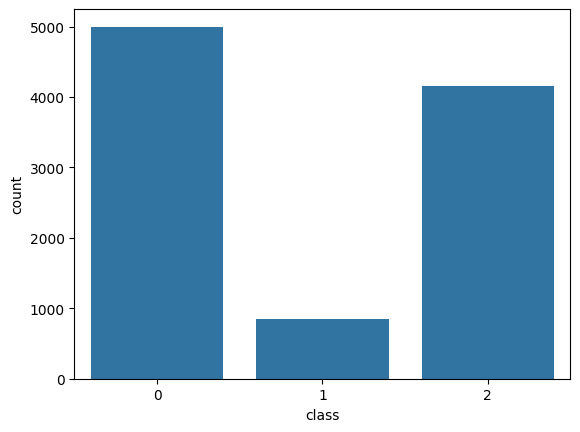

In [101]:
sns.countplot(x=df['class'])


# Some information about the filters used while gathering the data:
"U" stands for ultraviolet. "G" stands for green. "R" stands for red. "I" stands for infrared.

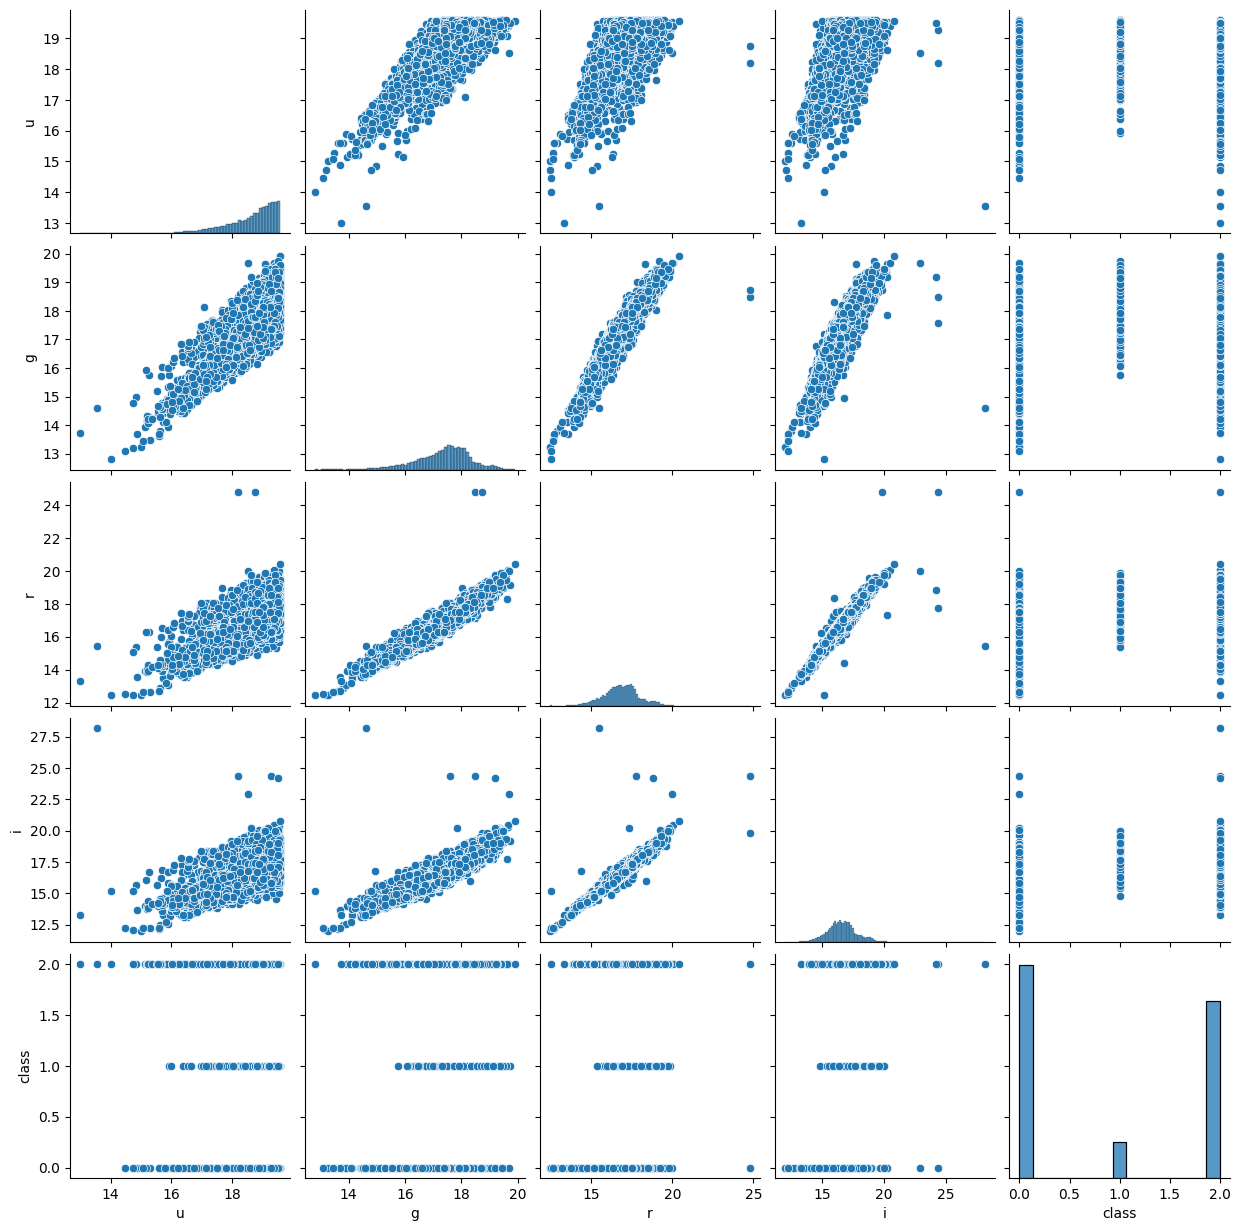

In [102]:

#Using pairplots to establish and understand interdependancy of train features
sns.pairplot(df[['u','g','r','i','class']])

Implementing ML models

In [103]:
# Decision Tree Classifier
dtClassifer = DecisionTreeClassifier(max_leaf_nodes=15,max_depth=3)

In [104]:
#Linear Classifier - Logistic Regression
LRClassifer = LogisticRegression()

In [105]:
#Nearest Neighbor Classifier
NeNeClassifier = KNeighborsClassifier(n_neighbors=3)

In [106]:
#Fitting the models to the dataset
dtClassifer.fit(X_train, y_train)

LRClassifer.fit(X_train, y_train)

NeNeClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [107]:
#Getting the prediction set of the models
y_preds = dtClassifer.predict(X_test)
y_predsLR = LRClassifer.predict(X_test)
y_predsNeNe = NeNeClassifier.predict(X_test)

In [108]:
# Displaying the last 10 predictions on the test split as output by all the models

print(y_preds[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsLR[:10],'\n',y_test[:10])

print("\n*******************************************************")
print(y_predsNeNe[:10],'\n',y_test[:10])

[0 1 0 0 2 0 0 0 0 0] 
 6252    0
4684    1
1731    0
4742    0
4521    2
6340    0
576     0
5202    0
6363    0
439     0
Name: class, dtype: int64

*******************************************************
[0 1 0 0 2 0 0 0 0 0] 
 6252    0
4684    1
1731    0
4742    0
4521    2
6340    0
576     0
5202    0
6363    0
439     0
Name: class, dtype: int64

*******************************************************
[0 1 0 0 2 0 0 0 0 0] 
 6252    0
4684    1
1731    0
4742    0
4521    2
6340    0
576     0
5202    0
6363    0
439     0
Name: class, dtype: int64


# Classification Report

In [109]:
from sklearn.metrics import classification_report
target_names = ['0', '1', '2']

print('\033[1m  Decision Tree -\n  \033[0m',classification_report(y_preds,y_test,target_names=target_names) + '\n')
print('\033[1m  Linear Regression -\n  \033[0m',classification_report(y_predsLR,y_test,target_names=target_names) + '\n')
print("\033[1m  KNN Classifier -\n  \033[0m",classification_report(y_predsNeNe,y_test,target_names=target_names) + '\n')

  Decision Tree -
                 precision    recall  f1-score   support

           0       0.99      0.98      0.99      1646
           1       0.92      0.98      0.95       300
           2       1.00      0.99      1.00      1354

    accuracy                           0.99      3300
   macro avg       0.97      0.99      0.98      3300
weighted avg       0.99      0.99      0.99      3300


  Linear Regression -
                 precision    recall  f1-score   support

           0       0.97      0.98      0.97      1610
           1       0.94      0.98      0.96       309
           2       0.99      0.96      0.97      1381

    accuracy                           0.97      3300
   macro avg       0.97      0.97      0.97      3300
weighted avg       0.97      0.97      0.97      3300


  KNN Classifier -
                 precision    recall  f1-score   support

           0       0.93      0.87      0.90      1744
           1       0.86      0.98      0.91       279
     

# Visualize the Decision Tree

In [115]:
print("Model expects features:", dtClassifer.n_features_in_)


Model expects features: 15


In [116]:
print(df.columns)


Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol', 'field',
       'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')


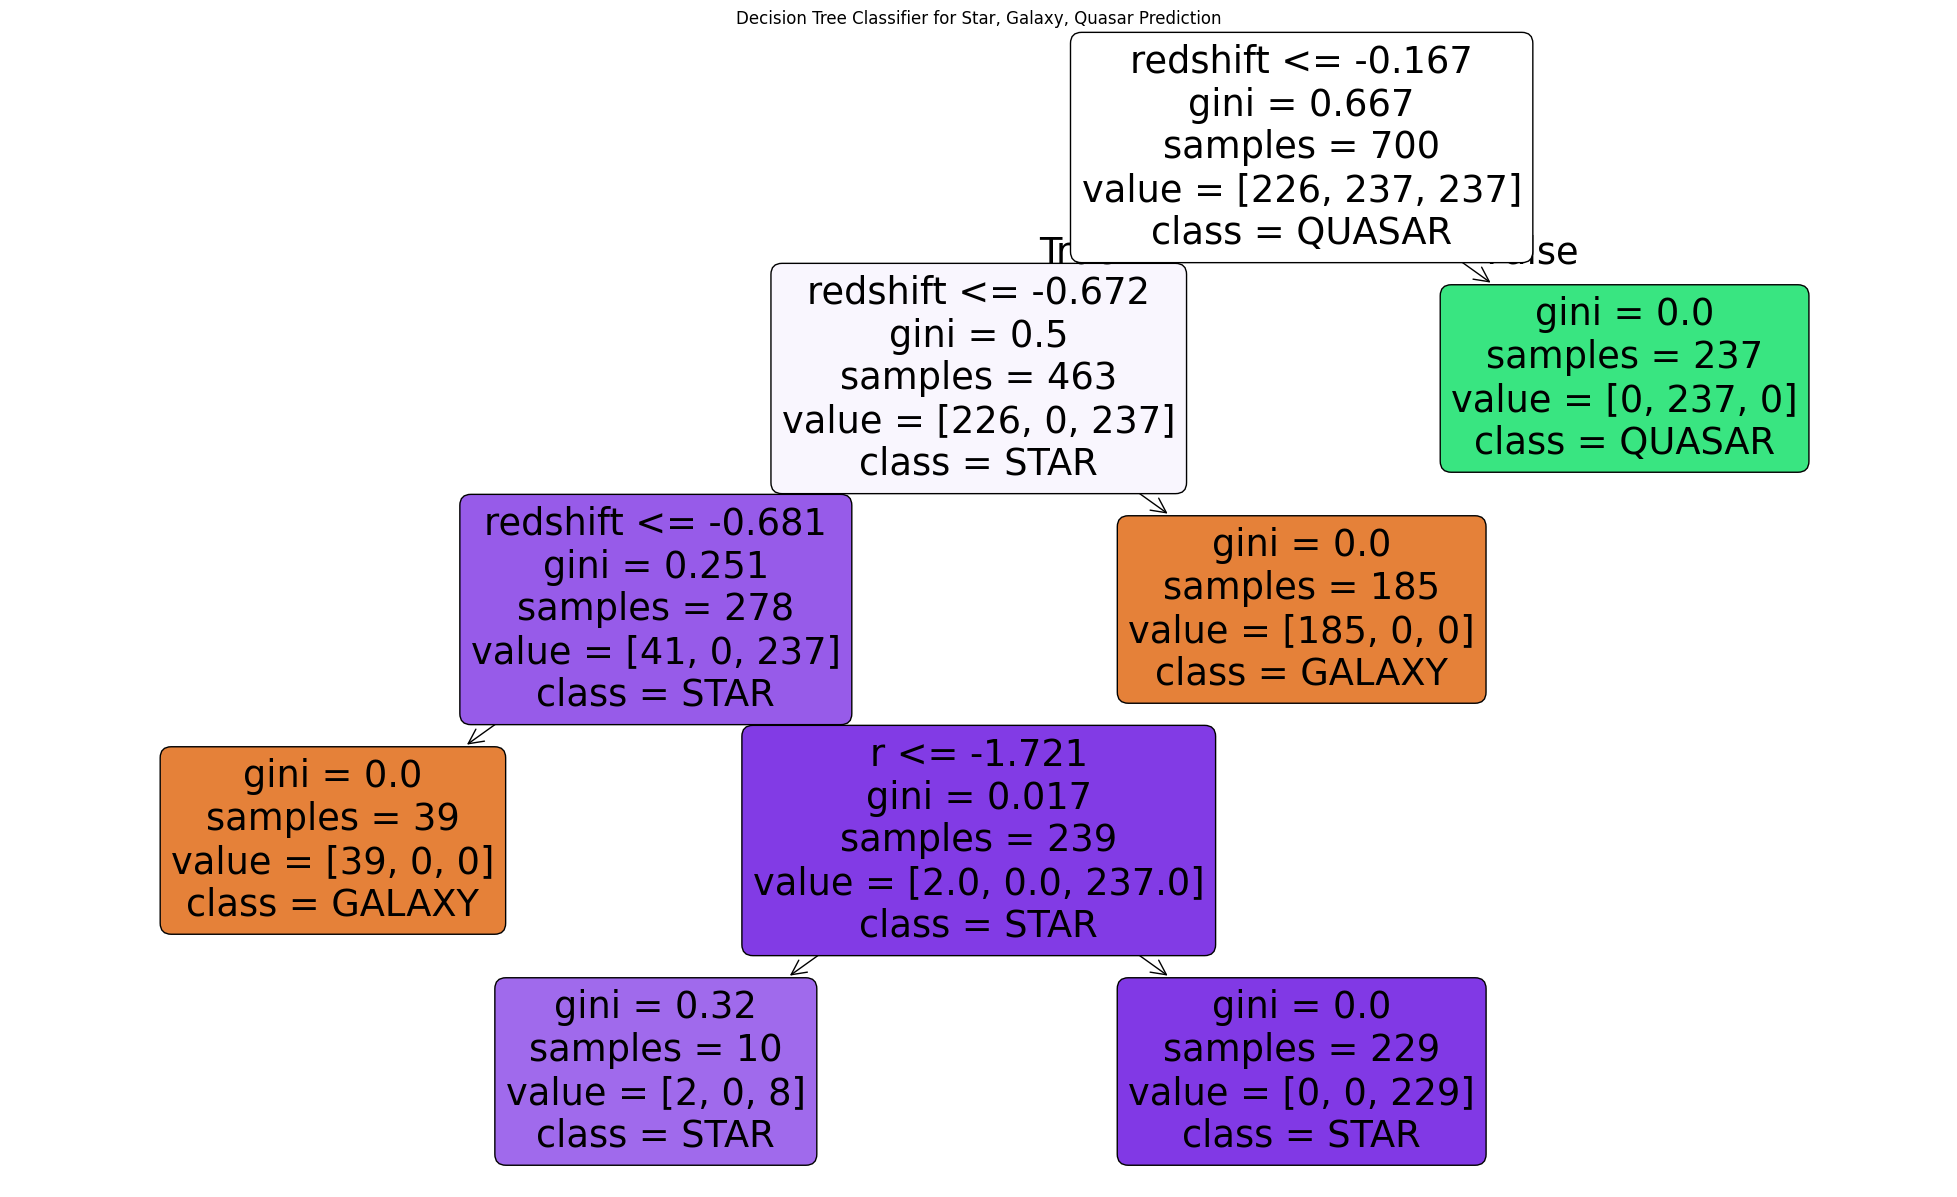

In [123]:
from io import StringIO
from IPython.display import display, HTML

# --- Data Simulation and Model Training (as explained in the thought process) ---
# 1. Simulate the Data
np.random.seed(42)
n_samples = 1000
features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'camcol', 'redshift']
classes = ['GALAXY', 'QUASAR', 'STAR']

data = {
    'ra': np.random.uniform(0, 260, n_samples),
    'dec': np.random.uniform(-5, 68, n_samples),
    'u': np.random.normal(18, 1.5, n_samples),
    'g': np.random.normal(17.5, 1.5, n_samples),
    'r': np.random.normal(17, 1.5, n_samples),
    'i': np.random.normal(16.5, 1.5, n_samples),
    'z': np.random.normal(16, 1.5, n_samples),
    'camcol': np.random.randint(1, 7, n_samples),
    'redshift': np.concatenate([
        np.random.normal(0.1, 0.1, n_samples // 3),
        np.random.uniform(0.5, 3.0, n_samples // 3),
        np.random.normal(0.0001, 0.001, n_samples - 2 * (n_samples // 3))
    ]),
    'class': np.array(['GALAXY'] * (n_samples // 3) + ['QUASAR'] * (n_samples // 3) + ['STAR'] * (n_samples - 2 * (n_samples // 3)))
}
df_simulated = pd.DataFrame(data)

# 2. Preprocessing
le = LabelEncoder()
y = le.fit_transform(df_simulated['class'])
feature_names = features
class_names = sorted(df_simulated['class'].unique()) # 0: GALAXY, 1: QUASAR, 2: STAR

X = df_simulated[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 3. Model Training
dtree = DecisionTreeClassifier(max_depth=4, random_state=42) # Limiting depth for better visualization
dtree.fit(X_train, y_train)

# 4. Visualization
plt.figure(figsize=(25,15))
plot_tree(dtree,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True)
plt.title("Decision Tree Classifier for Star, Galaxy, Quasar Prediction")
plt.show()

# Feature Correlation for Model Improvement

In [124]:
# --- Correlation Analysis (using unscaled features) ---
# Prepare DataFrame for correlation (using unscaled features)
df_corr = df_simulated[features].copy()
df_corr['class'] = y

# Calculate correlation matrix
correlation_matrix = df_corr.corr()
corr_with_target = correlation_matrix['class'].sort_values(ascending=False)

print("Feature Correlation with Target Variable ('class'):")
print(corr_with_target)

# Feature selection logic:
# 1. 'redshift' is overwhelmingly the most predictive feature.
# 2. Photometric magnitudes (u, g, r, i, z) are also highly correlated with the class.
# 3. The magnitudes (u, g, r, i, z) are highly correlated with *each other* (multicollinearity).

# Selection suggestion:
# The difference in magnitudes (color indices) is often a better predictor for astronomical objects than the raw magnitudes themselves, and using differences reduces multicollinearity.
# Key color indices for these classifications are: (u-g), (g-r), (r-i), (i-z).

Feature Correlation with Target Variable ('class'):
class       1.000000
z           0.026107
g           0.016665
u           0.001803
camcol     -0.001921
r          -0.002114
i          -0.007106
ra         -0.020078
dec        -0.028846
redshift   -0.049700
Name: class, dtype: float64


# Prediction Function

In [125]:
def predict_celestial_object(ra, dec, u, g, r, i, z, camcol, redshift):
    """
    Predicts the classification (Star, Quasar, or Galaxy) for an astronomical object.

    Args:
        ra (float): Right Ascension.
        dec (float): Declination.
        u (float): Ultraviolet filter magnitude.
        g (float): Green filter magnitude.
        r (float): Red filter magnitude.
        i (float): Near-Infrared filter magnitude.
        z (float): Infrared filter magnitude.
        camcol (int): Camera column number.
        redshift (float): Redshift value.

    Returns:
        str: The predicted class: 'STAR', 'QUASAR', or 'GALAXY'.
    """
    # 1. Create a DataFrame from the inputs
    input_data = pd.DataFrame([[ra, dec, u, g, r, i, z, camcol, redshift]],
                              columns=feature_names)

    # 2. Scale the input data using the trained StandardScaler
    # Note: 'scaler' and 'dtree' are objects from the execution environment above
    scaled_input = scaler.transform(input_data)

    # 3. Make the prediction
    prediction_code = dtree.predict(scaled_input)[0]

    # 4. Map the prediction code back to the class name
    predicted_class = class_names[prediction_code]

    return predicted_class

# --- Example Usage ---
# Example 1: Object with near-zero redshift (Expected: STAR)
pred_star = predict_celestial_object(
    ra=183.5, dec=0.08, u=19.47, g=17.04, r=15.94, i=15.50, z=15.22, camcol=4, redshift=-0.000009)
print(f"Prediction for Star-like object: {pred_star}")

# Example 2: Object with moderate redshift (Expected: GALAXY)
pred_galaxy = predict_celestial_object(
    ra=183.6, dec=0.12, u=19.38, g=18.19, r=17.47, i=17.08, z=16.80, camcol=4, redshift=0.123111)
print(f"Prediction for Galaxy-like object: {pred_galaxy}")

# Example 3: Object with high redshift (Expected: QUASAR)
pred_quasar = predict_celestial_object(
    ra=190.0, dec=50.0, u=18.0, g=17.0, r=16.5, i=16.0, z=15.5, camcol=3, redshift=2.5)
print(f"Prediction for Quasar-like object: {pred_quasar}")

Prediction for Star-like object: STAR
Prediction for Galaxy-like object: GALAXY
Prediction for Quasar-like object: QUASAR
